In [2]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

from gensim.models import Word2Vec

from nltk import word_tokenize
from nltk.corpus import stopwords


from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


In [ ]:
df=pd.read_csv("temp_dataset_with_source.csv",delimiter=";")
df.head()


,user,assistant,question,query_modifier_question,generated_answer,answer,labels,satisfaction
0,What are the main business activities of Bouyg...,The main business activities of Bouygues are h...,What other sectors are they involved in?,What other sectors is Bouygues involved in bes...,"Besides construction, real estate, media, and ...","Besides construction and real estate, Bouygues...",Bouygues,1
1,What is employee shareholding at Bouygues?,"Since 1970, Bouygues has developed an employee...",How did it help against Vincent Bolloré's atte...,How did employee shareholding at Bouygues help...,"In 1998, Bouygues' employee shareholding helpe...",The employee shareholding helped counter Vince...,Bouygues,1
2,Where is the headquarters of Bouygues located?,The headquarters of Bouygues is located at 32 ...,And what about Bouygues Construction?,Where is the headquarters of Bouygues Construc...,"The headquarters of Bouygues Construction, kno...","The headquarters of Bouygues Construction, kno...",Bouygues,1
3,What happens when you click on sponsored links...,When you click on sponsored links in search en...,How much money does this generate in France?,How much money do search engines earn from spo...,Search engines in France earn approximately 2....,"In France, this generates about 2.4 billion eu...",Bouygues,1
4,How can I install Lilo for all my employees?,"To install Lilo for all your employees, you ca...",Is there any cost involved?,Is there any cost involved in installing Lilo ...,Not enough information is available about the ...,"No, using Lilo in a business setting is simple...",Bouygues,0


In [4]:
df_bouygues=df[df['labels'] == 'Bouygues']
df_bouygues.shape

(12, 8)

In [9]:
# Define the text columns to be combined
text_columns = ["user","assistant", "question", "query_modifier_question", "generated_answer"]  # Replace with actual column names

for col in text_columns:
    df[col] = df[col].astype(str).fillna("")

# Combine all text fields into a single text column
df["text"] = df[text_columns].apply(lambda x: " | ".join(x), axis=1)

# Define stopwords (use sklearn's built-in stopwords)
custom_stopwords = set(ENGLISH_STOP_WORDS) | {"history", "question", "query_modifier_question", "generated_answer"}

# Tokenization and cleaning function (without NLTK)
def clean_and_tokenize(text):
    tokens = text.lower().split()  # Lowercase & split on whitespace
    tokens = [word for word in tokens if word.isalnum() and word not in custom_stopwords]  # Remove punctuation & stopwords
    return tokens

# Apply tokenization without using nltk
df["tokens"] = df["text"].astype(str).apply(clean_and_tokenize)

print(f"Pre-processed dataframe: {df.shape}")

Pre-processed dataframe: (144, 10)


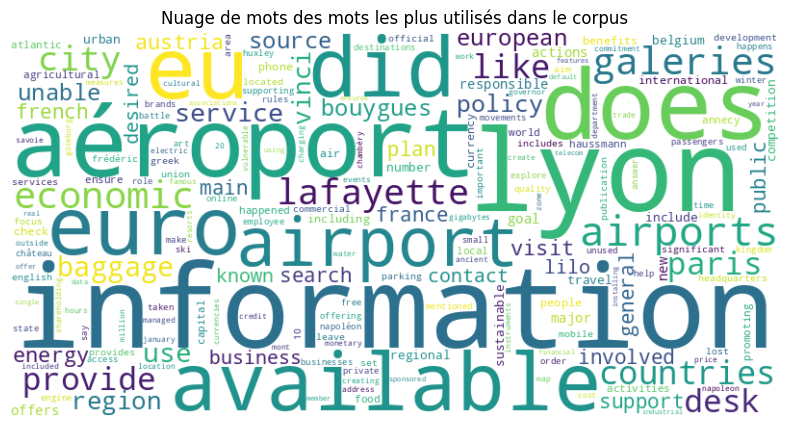

In [10]:
# Combine all tokens into a single list
all_tokens = [token for tokens in df["tokens"] for token in tokens]

# Count the frequency of each word
word_freq = Counter(all_tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots des mots les plus utilisés dans le corpus")
plt.show()

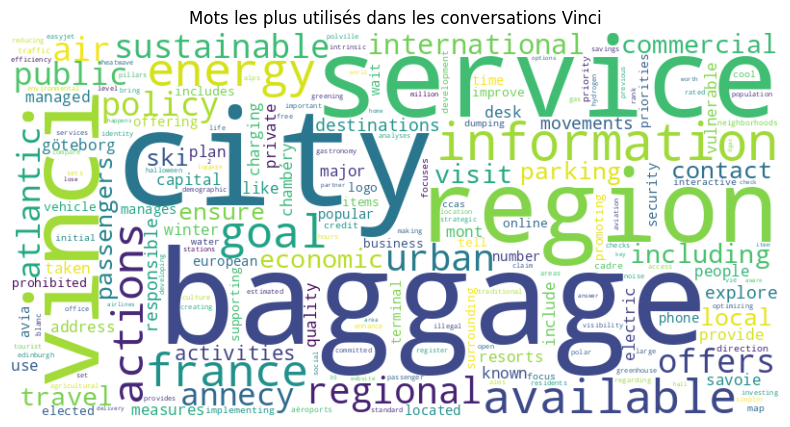

In [14]:
df_vinci= df[df["labels"] == "Vinci"]
# Filter tokens for rows where labels == "Bouygues"
vinci_tokens = [token for tokens in df_vinci["tokens"] for token in tokens]

# Exclude specific words from vinci_tokens
excluded_words = {"airport", "airports", "aéroport", "lyon","does","did"}
vinci_tokens = [token for token in vinci_tokens if token not in excluded_words]
# Count the frequency of each word
vinci_word_freq = Counter(vinci_tokens)

# Generate the word cloud
vinci_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vinci_word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(vinci_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Mots les plus utilisés dans les conversations Vinci")
plt.show()

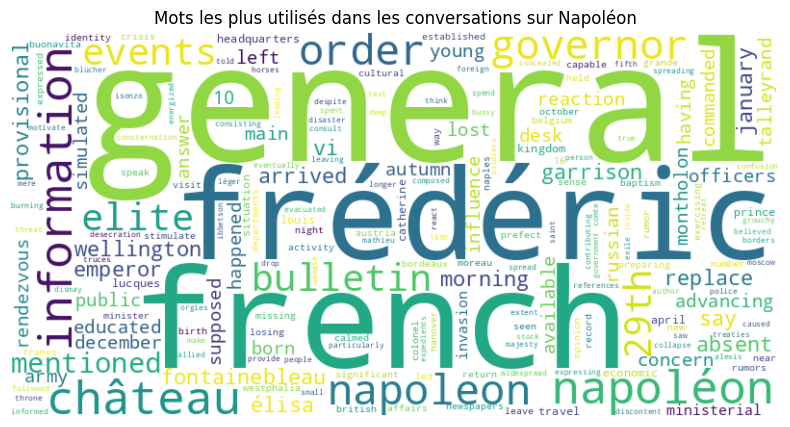

In [17]:
df_napoleon= df[df["labels"] == "Napoléon Experience"]
# Filter tokens for rows where labels == "Bouygues"
napoleon_tokens = [token for tokens in df_napoleon["tokens"] for token in tokens]

# Exclude specific words from vinci_tokens
excluded_words_nap = {"does","did","what","where","when","who","how","why","which","that","this","these","those"}
napoleon_tokens = [token for token in napoleon_tokens if token not in excluded_words_nap]
# Count the frequency of each word
napoleon_word_freq = Counter(napoleon_tokens)

# Generate the word cloud
napoleon_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(napoleon_word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(napoleon_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Mots les plus utilisés dans les conversations sur Napoléon")
plt.show()

In [19]:
df_tex=df.groupby("labels").head(1)
print(df_tex.to_latex(index=False))

\begin{tabular}{lllllllrll}
\toprule
user & assistant & question & query_modifier_question & generated_answer & answer & labels & satisfaction & text & tokens \\
\midrule
What are the main business activities of Bouygues? & The main business activities of Bouygues are historically related to construction and real estate. The group strengthened its industrial position in the 1980s with the acquisition of Colas, which is involved in road construction, and a stake in Alstom in 2006, which operates in energy and transport. Additionally, Bouygues diversified into media with the acquisition of TF1 and into telecommunications by obtaining the third mobile phone license. & What other sectors are they involved in? & What other sectors is Bouygues involved in besides construction, real estate, media, and telecommunications? & Besides construction, real estate, media, and telecommunications, Bouygues is also involved in energy, roads, and multi-technical services.  & Besides construction and real

In [22]:
df_raw=pd.read_csv("temp_dataset_with_source.csv",delimiter=";")
df_raw.head()

print(df_raw.head().to_latex(index=False))



\begin{tabular}{lllllllr}
\toprule
user & assistant & question & query_modifier_question & generated_answer & answer & labels & satisfaction \\
\midrule
What are the main business activities of Bouygues? & The main business activities of Bouygues are historically related to construction and real estate. The group strengthened its industrial position in the 1980s with the acquisition of Colas, which is involved in road construction, and a stake in Alstom in 2006, which operates in energy and transport. Additionally, Bouygues diversified into media with the acquisition of TF1 and into telecommunications by obtaining the third mobile phone license. & What other sectors are they involved in? & What other sectors is Bouygues involved in besides construction, real estate, media, and telecommunications? & Besides construction, real estate, media, and telecommunications, Bouygues is also involved in energy, roads, and multi-technical services.  & Besides construction and real estate, Bouygues 

In [23]:
df_raw.head()

,user,assistant,question,query_modifier_question,generated_answer,answer,labels,satisfaction
0,What are the main business activities of Bouyg...,The main business activities of Bouygues are h...,What other sectors are they involved in?,What other sectors is Bouygues involved in bes...,"Besides construction, real estate, media, and ...","Besides construction and real estate, Bouygues...",Bouygues,1
1,What is employee shareholding at Bouygues?,"Since 1970, Bouygues has developed an employee...",How did it help against Vincent Bolloré's atte...,How did employee shareholding at Bouygues help...,"In 1998, Bouygues' employee shareholding helpe...",The employee shareholding helped counter Vince...,Bouygues,1
2,Where is the headquarters of Bouygues located?,The headquarters of Bouygues is located at 32 ...,And what about Bouygues Construction?,Where is the headquarters of Bouygues Construc...,"The headquarters of Bouygues Construction, kno...","The headquarters of Bouygues Construction, kno...",Bouygues,1
3,What happens when you click on sponsored links...,When you click on sponsored links in search en...,How much money does this generate in France?,How much money do search engines earn from spo...,Search engines in France earn approximately 2....,"In France, this generates about 2.4 billion eu...",Bouygues,1
4,How can I install Lilo for all my employees?,"To install Lilo for all your employees, you ca...",Is there any cost involved?,Is there any cost involved in installing Lilo ...,Not enough information is available about the ...,"No, using Lilo in a business setting is simple...",Bouygues,0
